# **Secondary Stock Data - Feature Scoring and Ranking Using RFECV (Recursive Feature Elimination with Cross Validation) and Ridge Notebook**
## In this notebook we will take our secondary stock data that has been previously preprocessed in sec_stock_preprocessing.ipynb and apply a method called RFECV (Recursive Feature Elimination with Cross Validation).  This method works by removing the least important features and acts as a sort of professional interpreter for our features, sorting and selecting the most relevant of those we have in our dataframe while also simultaneously performing cross validation inside the model.  It doesn't work without a model though since it is a wrapper, so we will use Ridge once again.  We will also make sure to read in our unscaled version of the appropriate notebook for usage.  Once we complete our RFECV/Ridge our output and end methodology will be used to score and rank our original secondary stock data, as we will insert it into the generate_secondary_stocks.py script so our stock list can be optimized upon generation. 

#### As usual let's start by bringing in the libraries and logic necessary for reading in our file.

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

#### Now let's read in our notebook and take a look; we will need the (un)scaled version of our preprocessed secondary stock data.

In [2]:
# Now let's access the main core_stock_data.csv file
csv_path = os.path.join(project_root, 'data', 'sec_stock_unscaled.csv')
sec_stock_data = pd.read_csv(csv_path, parse_dates=['Date'], index_col= 'Date')
print(sec_stock_data.head())
print(sec_stock_data.shape)

           ticker   Close_sec  Volume_sec    Open_sec    High_sec     Low_sec  \
Date                                                                            
2019-03-14    RMD  101.000000   13.787626  102.570000  102.570000  100.959999   
2019-03-15    RMD  100.370003   14.639423  100.900002  101.730003  100.199997   
2019-03-18    RMD   97.400002   14.465594  100.360001  100.610001   96.940002   
2019-03-19    RMD   97.900002   13.911821   97.660004   98.190002   97.070000   
2019-03-20    RMD   98.809998   14.199140   99.129997  100.800003   98.449997   

             SMA_sec     EMA_sec    RSI_sec   BBM_sec  ...  \
Date                                                   ...   
2019-03-14  104.9046  101.000000  63.818062  104.9046  ...   
2019-03-15  104.9046  100.975294  63.818062  104.9046  ...   
2019-03-18  104.9046  100.835087  63.818062  104.9046  ...   
2019-03-19  104.9046  100.719985  63.818062  104.9046  ...   
2019-03-20  104.9046  100.645084  63.818062  104.9046  ...  

#### We need to treat this like any other model, establishing our X,y and doing a train_test_split.  We will prepare the Ridge and then wrap the RFECV around it afterwards.

In [3]:
# Let's set up our X,y features and target respectively
X = sec_stock_data.drop(columns = ['Close_sec', 'ticker'])
y = sec_stock_data['Close_sec']
type(X), type(y)


(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [4]:
# Now let's do our train_test_split to prepare our variables for the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Now let's initialize the Ridge model.
ridge_sec = Ridge(alpha = 0.5, random_state = 42)

# Now set up the RFECV and implement and fit the Ridge model.
rfecv_sec = RFECV(estimator = ridge_sec, step = 1, cv = 5, scoring = 'neg_root_mean_squared_error', verbose = 2)
rfecv_sec.fit(X_train, y_train)

# Let's see how many features are optimal for this model
print(f"Optimal number of features: {rfecv_sec.n_features_}")


Fitting estimator with 151 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50869e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 150 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50971e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 149 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.51373e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 148 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.6331e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 147 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63291e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 146 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63291e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 145 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63293e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 144 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63293e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 143 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63293e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 142 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63293e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 141 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63309e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 140 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50738e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 139 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50738e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 138 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50739e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 137 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.50739e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 136 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.99785e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 135 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.96367e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 134 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.77208e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 133 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.65085e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 132 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.64541e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 131 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.69044e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 130 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40446e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
F

c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.51303e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 150 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.51722e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 149 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63708e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 148 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63867e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 147 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63867e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 146 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.50308e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 145 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12118e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 144 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.216e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 143 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.66525e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 142 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.13687e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 141 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.84113e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 140 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.89637e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
F

c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.55138e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 146 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12957e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 145 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.23495e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 144 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.67822e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 143 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.59543e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 142 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.77375e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 141 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4103e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
F

c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 150 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42421e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 149 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.42523e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 148 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.52302e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 147 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.52302e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 146 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.52302e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 145 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.34952e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 144 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09874e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 143 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.63029e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 142 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.6985e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 141 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69949e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 140 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.76005e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 139 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.76005e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 138 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69959e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 137 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69959e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 136 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.76005e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 135 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.76005e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 134 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.33865e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 133 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.33854e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 132 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.33854e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 131 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.33853e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 130 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.33853e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 129 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69839e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 128 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69839e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 127 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69833e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 126 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69833e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 125 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69833e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 124 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.52624e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 123 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31799e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 122 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31799e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 121 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31799e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 120 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69844e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 119 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.318e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 118 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.33875e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 117 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69819e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 116 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31818e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 115 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31818e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 114 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31818e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 113 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.31818e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 112 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.3182e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 111 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69822e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 110 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69822e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 109 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69834e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 108 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69834e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 107 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69834e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 106 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69834e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 105 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69834e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 104 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69832e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 103 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69832e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 102 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69832e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 101 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69832e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 100 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69828e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 99 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69828e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 98 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69828e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 97 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69828e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 96 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.6984e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 95 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.6984e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 94 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.6984e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 93 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69822e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 92 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69821e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 91 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69821e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 90 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69821e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 89 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69867e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 88 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69862e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 87 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69865e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 86 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69865e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 85 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69865e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 84 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69859e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 83 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69888e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 82 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69969e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 81 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69969e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 80 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69974e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 79 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69973e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 78 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69973e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 77 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69998e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 76 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.36037e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 75 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.36037e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 74 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.36031e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 73 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.86447e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 72 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.86444e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 71 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.86444e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 70 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.86444e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 69 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.86444e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 68 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.26275e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 67 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.26281e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 66 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.26281e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 65 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.99571e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 64 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.2628e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 63 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.99573e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 62 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.99574e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 61 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.26278e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 60 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.52613e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 59 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.64615e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 58 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.86178e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 57 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.31706e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.16906e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 150 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.17203e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 149 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.17269e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 148 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.96056e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 147 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.96056e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 146 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.96056e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 145 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.95954e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 144 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.95953e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 143 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60768e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 142 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.61086e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 141 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.61086e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 140 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.61086e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 139 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60804e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 138 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60801e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 137 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60804e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 136 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.608e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 135 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.608e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 134 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 133 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 132 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 131 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 130 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 129 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 128 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 127 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 126 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 125 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.40403e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 124 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60809e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 123 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60809e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 122 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60809e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 121 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60809e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 120 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.6081e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 119 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.6081e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 118 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60815e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 117 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.46368e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 116 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11532e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 115 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.20711e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 114 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.66634e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 113 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.57892e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 112 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.69332e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 111 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40447e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator

c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.5935e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 150 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.5968e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 149 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.59757e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 148 features.
Fitting estimator with 147 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.97483e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 146 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.93173e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 145 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.76629e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 144 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.73557e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 143 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.6705e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 142 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.41106e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 141 features.


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12746e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
F

#### Let's go over the results from our Ridge model.  We will look at the features that our RFECV dynamically selected as the best features from our data.

In [6]:
rfecv_features = X_train.columns[rfecv_sec.support_] # Optimum features

print(f"Selected important features: {rfecv_features}")

# Let's then save our optimum features for our next repeated model
X_train_selected = X_train[rfecv_features]
X_test_selected = X_test[rfecv_features]


Selected important features: Index(['EMA_sec', 'Diff_Close_EMA_sec'], dtype='object')


#### We will now re-run the Ridge model using only our optimum features.  RFECV has done its job so we don't need to use it again.

In [7]:
ridge_sec_final = Ridge(alpha = 0.5, random_state = 42)
ridge_sec_final.fit(X_train_selected, y_train)

Ridge(alpha=0.5, random_state=42)

#### Now let's look at our predictions.

In [8]:
y_pred = ridge_sec_final.predict(X_test_selected)

#### Let's see how we did by looking at some metrics, we will use the same ones we have used in other notebooks so far in this project.

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test_selected.shape[0]
p = X_test_selected.shape[0]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2: {r2}")
print(f"Adjusted R2: {adjusted_r2}")

RMSE: 7.919888395783953e-08
MAPE: 1.554781157762882e-10
R2: 1.0
Adjusted R2: 1.0


#### Metric review.

#### Now let's perform cross-validation to ensure we have done a good job with our model and selecting the best features, and to make sure we are not overfitting.  We will cross-validate for each metric we have chosen to use above in RMSE, MAPE, R2, and adjusted R2.

In [10]:
# First we need to come up with separate "scorers" for both adjusted R2 and MAPE metrics, as well as RMSE.
# The custom scorer for Adjusted R2.
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# The MAPE scorer using the make_scorer import
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# The RMSE scorer.
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Now we will continue with our cross_validation, starting with the RMSE.
cv_rmse_scores = cross_val_score(ridge_sec_final, X_test_selected, y_test, cv = 5, scoring = rmse_scorer)
avg_rmse = np.mean(-cv_rmse_scores)

# Let's look at our MAPE cross-val scores now
cv_mape_scores = cross_val_score(ridge_sec_final, X_test_selected, y_test, cv = 5, scoring = mape_scorer)
avg_mape = np.mean(-cv_mape_scores)

# Now the R2 cross_val scores.
cv_r2_scores = cross_val_score(ridge_sec_final, X_test_selected, y_test, cv = 5, scoring = 'r2')
avg_r2 = np.mean(cv_r2_scores)

# Finally the adjusted r2 cross-val scores.  We have to calculate this manually, works a bit differently.
n = X_test_selected.shape[0]
p = X_test_selected.shape[0]
avg_adj_r2 = np.mean([adjusted_r2_score(r2, n, p) for r2 in cv_r2_scores])

# Now we can print our results
print(f"Cross-validated RMSE: {avg_rmse}")
print(f"Cross-validated MAPE: {avg_mape}")
print(f"Cross-validated R2: {avg_r2}")
print(f"Cross-validated Adjusted R2: {avg_adj_r2}")



Cross-validated RMSE: 3.980738886683202e-07
Cross-validated MAPE: 7.941507197967914e-10
Cross-validated R2: 1.0
Cross-validated Adjusted R2: 1.0


#### Let's make a few plots to visualize the results of our models in this notebook.  As we have drawn up before we will plot an Actual vs Predicted plot and a Residuals plot.

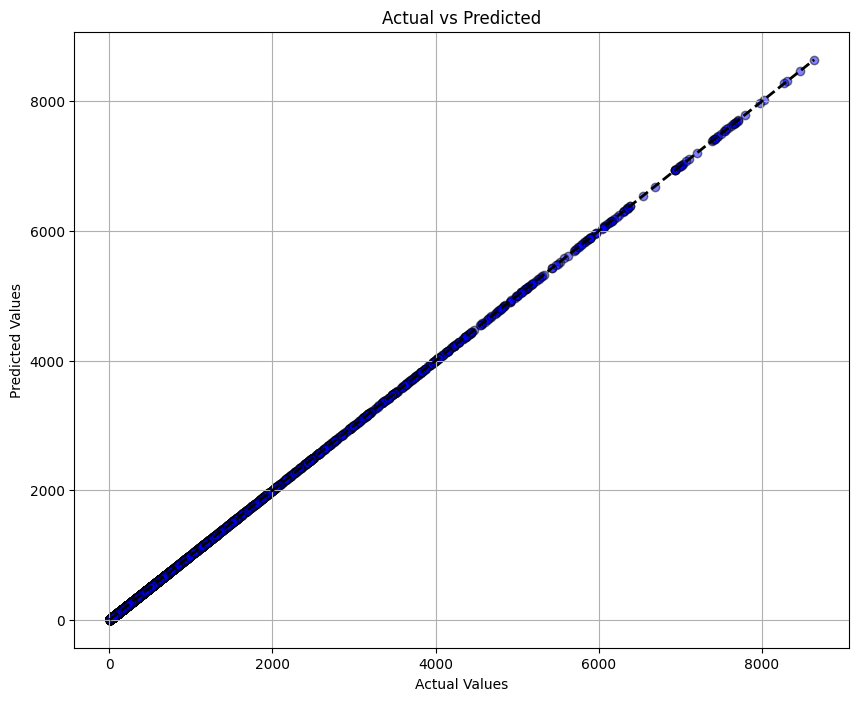

In [11]:
# Plotting the Actual vs Predicted Values
plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, color = 'blue', edgecolor = 'black', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')

plt.grid(True)
plt.show()

#### Plot Review.

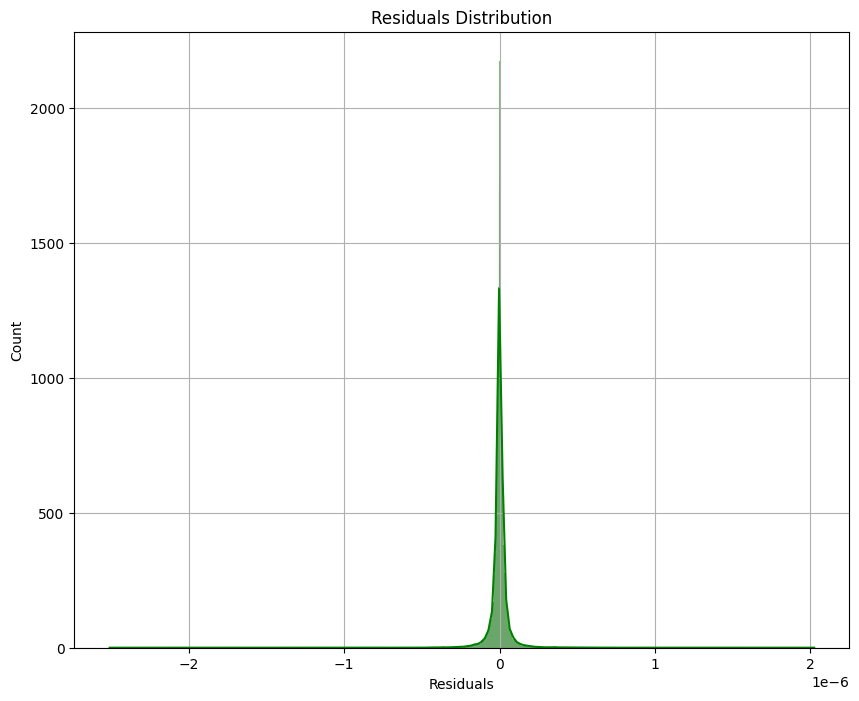

In [12]:
# Plotting the Residuals.
residuals = y_test - y_pred

plt.figure(figsize = (10,8))
sns.histplot(residuals, kde = True, color = 'green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.grid(True)
plt.show()

#### Plot Review.

#### Upon inital results it appears we have some data leakage going on, a lot of it to say the least.  Let's look at a correlation matrix to see what features have any unusally high relationships with our target.

In [13]:
# Set up the correlation matrix, checking correlation with y_trian first to examine highly correlated features.
correlation_features = X_train.corrwith(y_train)

corr_matrix = X_train.corr()

print("Correlation with y_train:")
print(correlation_features.sort_values(ascending = False))


Correlation with y_train:
Low_sec                   0.999919
High_sec                  0.999914
Open_sec                  0.999824
Close_sec_Lag_1           0.999170
Low_sec_Lag_1             0.999099
                            ...   
Volume_sec_Lag_2         -0.139384
Volume_sec_Lag_3         -0.139726
Volume_sec_Lag_1         -0.139786
Volume_Lag_Avg_1_3_sec   -0.145859
Volume_sec               -0.448063
Length: 151, dtype: float64


#### We need to set up a threshold so we can isolate the features that are correlating too closely with our target, as these features are the ones causing the data leakage.  We will then work to isolate and then filter them out.

In [14]:
# Establish the threshold.
threshold = 0.95

# Print the correlation matrix we established in the previous cell.
print("Correlation Matrix:")
print(corr_matrix)

# we will now find the PAIRS of features that are highly correlated.  This is important so we don't just callously remove features.
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)

# We will create a l;ist of these pairs, with the exception of any features that correlate with each other (self-correlation)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y, in zip(*high_corr_pairs) if x != y and x < y]

print(f"Highly correlated feature pairs (correlation > {threshold}):")
for pair in high_corr_pairs:
    print(pair)

# We will now remove one feature from each of these pairs, since these pairs have high concentrations of correlation we are diluting the correlation and trying to establish more stability back to our data.
features_to_drop = set()

for feature_a, feature_b in high_corr_pairs:
    features_to_drop.add(feature_b) # Dropping second feature in each pair

X_train_filtered = X_train.drop(columns = features_to_drop)
X_test_filtered = X_test.drop(columns = features_to_drop)

# Print results for observation
print(f"Number of highly correlated features to drop: {len(features_to_drop)}")
print(f"Features excluded: {features_to_drop}")

Correlation Matrix:
                             Volume_sec  Open_sec  High_sec   Low_sec  \
Volume_sec                     1.000000 -0.448036 -0.447609 -0.448412   
Open_sec                      -0.448036  1.000000  0.999916  0.999909   
High_sec                      -0.447609  0.999916  1.000000  0.999882   
Low_sec                       -0.448412  0.999909  0.999882  1.000000   
SMA_sec                       -0.447664  0.997131  0.997234  0.996922   
...                                 ...       ...       ...       ...   
Momentum_50_Lag_Std_1_3_sec   -0.314893  0.718408  0.719957  0.716515   
OBV_Lag_Avg_1_3_sec            0.192196 -0.033322 -0.033275 -0.033397   
OBV_Lag_Std_1_3_sec            0.400756 -0.090941 -0.090870 -0.090934   
Diff_Close_EMA_sec            -0.141312  0.341600  0.341713  0.345774   
Ratio_Close_EMA_sec           -0.078623  0.056314  0.056579  0.057905   

                              SMA_sec   EMA_sec   RSI_sec   BBM_sec   BBU_sec  \
Volume_sec            

#### This worked out pretty well, we filtered out 92 features that were correlating too high!  We will however need to re-run our RFECV/Ridge model with our revised feature list and look at observations once more.  We will just need to run it once though.

In [15]:
# Redefine our Ridge model with RFECV, isn't completely necessary we could pull from above but helps for readability.
ridge_filter = Ridge(alpha = 0.5, random_state = 42)
rfecv_filter = RFECV(estimator = ridge_filter, step = 1, cv = 5, scoring = 'neg_mean_squared_error')

# Now when we fit the model we will use our filtered data.
rfecv_filter.fit(X_train_filtered, y_train)

selected_featured_filtered = X_train_filtered.columns[rfecv_filter.support_]
print(f"Selected important features: {selected_featured_filtered}")


c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.21843e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.37347e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.34146e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ryanm\Desktop\Portfolio-Proj-WK\DL-Strategies\DL-Strat\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.03526e-21): result may no

Selected important features: Index(['Volume_sec', 'Open_sec', 'MACD_sec', 'MACD_Signal_sec', 'CCI_20_sec',
       'ATR_14_sec', 'Stoch_K_sec', 'Stoch_D_sec', 'Momentum_1_sec',
       'Momentum_3_sec', 'Momentum_7_sec', 'CCI_20_sec_Lag_1',
       'Stoch_K_sec_Lag_2', 'Momentum_1_sec_Lag_1', 'Momentum_1_sec_Lag_2',
       'Momentum_1_sec_Lag_3', 'Momentum_3_sec_Lag_1', 'Momentum_3_sec_Lag_2',
       'Momentum_3_sec_Lag_3', 'Momentum_7_sec_Lag_3', 'Close_Lag_Std_1_3_sec',
       'EMA_Lag_Std_1_3_sec', 'MACD_Lag_Std_1_3_sec',
       'MACD_Signal_Lag_Std_1_3_sec', 'MACD_Hist_Lag_Std_1_3_sec',
       'ATR_14_Lag_Std_1_3_sec', 'Momentum_3_Lag_Std_1_3_sec',
       'Momentum_30_Lag_Std_1_3_sec', 'Momentum_50_Lag_Std_1_3_sec',
       'Diff_Close_EMA_sec', 'Ratio_Close_EMA_sec'],
      dtype='object')


#### We have warnings in our output that suggest we still have a fair amount of multicollinearity in our features, even after we filtered it the first time.  Let's do a VIF (Variance Inflation Factor) check real quick.  Depending on the ouput of the VIF, we can go back up and adjust our initial threshold modifier, then re-run our filtered model, then our VIF again, and so on until we have our desired feature set with normalized collinearity.  If it gets to a certain point we can review the VIF scores and manually drop certain highly correlated features. (Stop here until collinearity is regulated).

#### Now let's set up our predictions on the model with our metrics.

In [16]:
y_pred_filtered = rfecv_filter.predict(X_test_filtered[selected_featured_filtered])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ADX_14_Lag_Std_1_3_sec
- ADX_14_sec
- CCI_20_Lag_Std_1_3_sec
- CCI_20_sec_Lag_2
- CCI_20_sec_Lag_3
- ...


In [ ]:
# Re-apply the metric logic to review the new set of metrics for the filtered data.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test_selected.shape[0]
p = X_test_selected.shape[0]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2: {r2}")
print(f"Adjusted R2: {adjusted_r2}")

#### Review metrics.

#### Let's also revise and review the cross-validation scores while we are at it to make sure we are on the right path with our progress with the features.

In [ ]:
# The below was just taken from above and edited for our new filtered variables to review the cross-val scores.  First we need to come up with separate "scorers" for both adjusted R2 and MAPE metrics, as well as RMSE.
# The custom scorer for Adjusted R2.
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# The MAPE scorer using the make_scorer import
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# The RMSE scorer.
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# Now we will continue with our cross_validation, starting with the RMSE.
cv_rmse_scores = cross_val_score(rfecv_filter, X_test_filtered, y_test, cv = 5, scoring = rmse_scorer)
avg_rmse = np.mean(-cv_rmse_scores)

# Let's look at our MAPE cross-val scores now
cv_mape_scores = cross_val_score(rfecv_filter, X_test_filtered, y_test, cv = 5, scoring = mape_scorer)
avg_mape = np.mean(-cv_mape_scores)

# Now the R2 cross_val scores.
cv_r2_scores = cross_val_score(rfecv_filter, X_test_filtered, y_test, cv = 5, scoring = 'r2')
avg_r2 = np.mean(cv_r2_scores)

# Finally the adjusted r2 cross-val scores.  We have to calculate this manually, works a bit differently.
n = X_test_selected.shape[0]
p = X_test_selected.shape[0]
avg_adj_r2 = np.mean([adjusted_r2_score(r2, n, p) for r2 in cv_r2_scores])

# Now we can print our results
print(f"Cross-validated RMSE: {avg_rmse}")
print(f"Cross-validated MAPE: {avg_mape}")
print(f"Cross-validated R2: {avg_r2}")
print(f"Cross-validated Adjusted R2: {avg_adj_r2}")


#### Cross Val Score Review.

#### Finally let's replot those two plots from above in the Actual vs Predicted and Distribution of Residuals to see how they look now with our changes to filtered features.

In [ ]:
# Plotting the Actual vs Predicted Values
plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, color = 'blue', edgecolor = 'black', alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted with RFECV Filtered Features')

plt.grid(True)
plt.show()

#### Plot Review.

#### Finally let's look at the Distribution of Residuals plot.

In [ ]:
# Plotting the Residuals.
residuals = y_test - y_pred

plt.figure(figsize = (10,8))
sns.histplot(residuals, kde = True, color = 'green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.grid(True)
plt.show()

#### Plot review.

#### Notebook summary.